In [2]:
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score

In [3]:
sms_data = "smsspamcollection\\SMSSpamCollection"
df = pd.read_table(sms_data, sep='\t', header=None, names=['label', 'sms_message'])
df['label'] = df.label.map({'ham':0, 'spam':1})

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], df['label'], random_state=1)
# print total size , train_size , and test_size
print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

count_vectorizer = CountVectorizer()

training_data = count_vectorizer.fit_transform(X_train)

testing_data = count_vectorizer.transform(X_test)


Number of rows in the total set: 5572
Number of rows in the training set: 4179
Number of rows in the test set: 1393


In [8]:
naive_bayes = MultinomialNB()

naive_bayes.fit(training_data, y_train)
predictions = naive_bayes.predict(testing_data)


In [17]:
# Manually train_test_split 


df.head(5)

df.sample(frac=1, random_state=1).head(5)

ratio = 0.75
 
total_rows = df.shape[0]
train_size = int(total_rows*ratio)
 
# Split data into test and train
train = df[0:train_size]
print(train.shape[0])
test = df[train_size:]
print(test.shape[0])

4179
1393


In [20]:
from collections import Counter

documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']

lower_case_documents = []
for i in documents:
    lower_case_documents.append(i.lower())
print(lower_case_documents)

sans_punctuation_documents = []
import string

for i in lower_case_documents:
    sans_punctuation_documents.append(i.translate(str.maketrans('', '', string.punctuation)))
print(sans_punctuation_documents)

preprocessed_documents = []
for i in sans_punctuation_documents:
    preprocessed_documents.append(i.split(' '))
print(preprocessed_documents)

frequency_list = []
import pprint
for i in preprocessed_documents:
    frequency_list.append(Counter(i))
pprint.pprint(frequency_list)

count_vector = CountVectorizer()
# docarray then to array
count_vector.fit(documents)

pd.DataFrame(count_vector.transform(documents).toarray(), columns=count_vector.get_feature_names_out())

['hello, how are you!', 'win money, win from home.', 'call me now.', 'hello, call hello you tomorrow?']
['hello how are you', 'win money win from home', 'call me now', 'hello call hello you tomorrow']
[['hello', 'how', 'are', 'you'], ['win', 'money', 'win', 'from', 'home'], ['call', 'me', 'now'], ['hello', 'call', 'hello', 'you', 'tomorrow']]
[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'hello': 2, 'call': 1, 'you': 1, 'tomorrow': 1})]


,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


## Speech Recognition Module

In [1]:
#import library
import speech_recognition as sr
import os
#Initiаlize  reсоgnizer  сlаss  (fоr  reсоgnizing  the  sрeeсh)
r = sr.Recognizer()
#Imроrt  the  аudiо  file
wav_files = [f for f in os.listdir() if f.startswith('uh')]

for audio in wav_files:
    #Use  the  reсоgnize_google()  funсtiоn  tо  reсоgnize  the  аudiо
    with sr.AudioFile(audio) as source:
        # print('Say  something!')
        audio = r.record(source)
        # print('Done!')
    try:
        print('You  said: ' + r.recognize_google(audio))
    except Exception as  e:
        print('Error:  ' + str(e))

You  said: my name is


In [2]:
# get all mp3 files in this directory
import os
wav_files = [f for f in os.listdir('.') if f.startswith('Intro')]
print(wav_files)

['Introduction.wav']


In [21]:
# magic command to list all the files in the current directory
%ls *.wav

 Volume in drive C has no label.
 Volume Serial Number is 80C1-6413

 Directory of c:\Users\Oreo\Documents\NLP-Exercises-master\NLP-Exercises-master\1.5-spam-classifier

02/22/2024  07:08 PM           457,294 fake1.wav
02/22/2024  07:08 PM           262,222 real.wav
02/22/2024  07:08 PM           230,478 real2.wav
02/22/2024  07:08 PM           253,006 real3.wav
02/22/2024  07:08 PM           236,622 real4.wav
02/22/2024  07:08 PM            99,842 sample-0.wav
02/16/2024  01:11 PM            92,878 sample-2.wav
               7 File(s)      1,632,342 bytes
               0 Dir(s)  63,406,948,352 bytes free


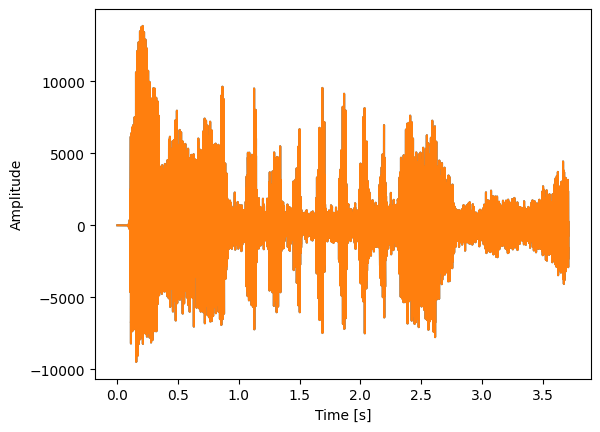

In [7]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import os

# read the file
samplerate, data = wavfile.read('e3aqa.wav')
# get the duration
duration = len(data)/samplerate
# create a time variable
time = np.arange(0,duration,1/samplerate)
# plot amplitude (or loudness) over time
plt.plot(time,data)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()


In [10]:
# put the above cell in one function 
def plot_wav(filename):
    # read the file
    samplerate, data = wavfile.read(filename)
    # get the duration
    duration = len(data)/samplerate
    # create a time variable
    time = np.arange(0,duration,1/samplerate)
    # plot amplitude (or loudness) over time
    plt.plot(time,data)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    # put a label with the file name 
    plt.title(filename)
    plt.show()


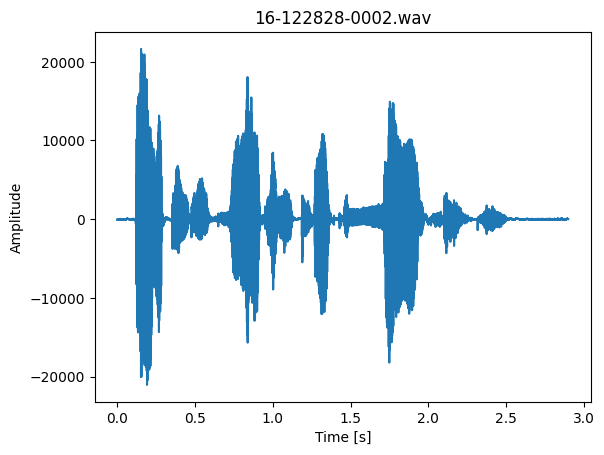

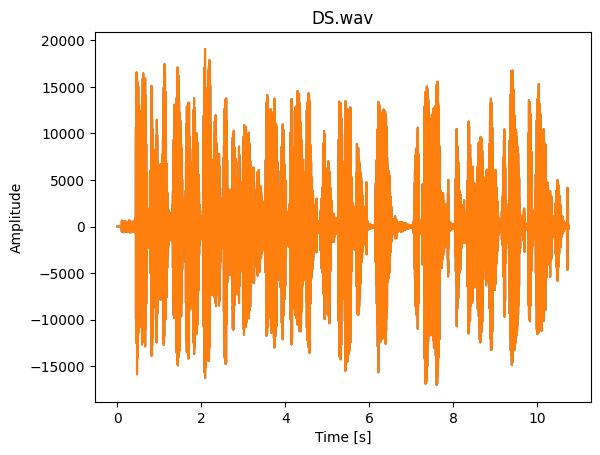

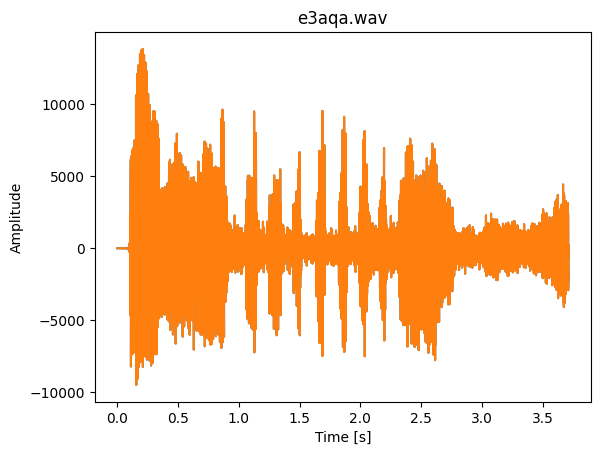

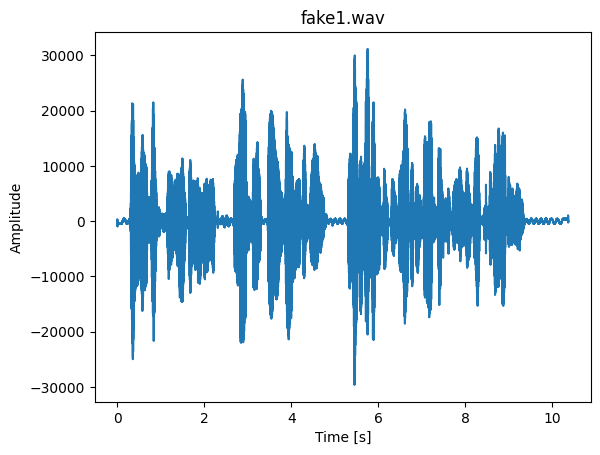

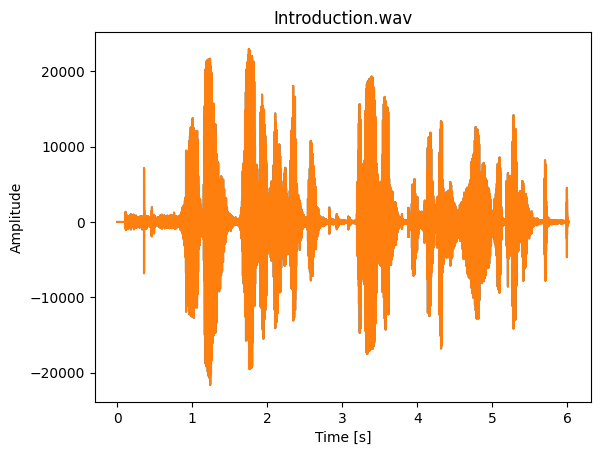

In [11]:
wav_files = [f for f in os.listdir('.') if f.endswith('.wav')]
for wav_file in wav_files[:5]:
    plot_wav(wav_file)